# Assignment 1

Discussed with : Ramki Ramamurthy and Sushant Kotwal

References:</br>
1.https://www.tensorflow.org/tutorials/quickstart/beginner </br>
2.https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/</br>
3.https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/</br>
4.https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin</br>
5.https://www.machinelearningplus.com/plots/subplots-python-matplotlib/#:~:text=Subplots%20mean%20a%20group%20of,canvas%20that%20holds%20multiple%20plots. </br>
6.https://numpy.org/doc/stable/reference/generated/numpy.argsort.html </br>
7.https://www.tensorflow.org/guide/keras/sequential_model </br>
8  https://github.com/tensorflow/tensorflow/issues/46076 </br>
9.https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc </br>
10.https://www.tensorflow.org/guide/keras/sequential_model </br>

In [ ]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import keras
import keras.utils
from keras import utils as np_utils
%matplotlib inline  

Found GPU at: /device:GPU:0


In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


Code to check if GPU is working

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.8302020999999513
GPU (s):
0.04394502599996031
GPU speedup over CPU: 64x


In [ ]:

# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Lets see the shapes of each Data sets
print("TRAIN SET:")
print("Training Set X_train shape is : {}".format(X_train.shape))
print("Training Set y_train shape is : {}".format(y_train.shape))
print("____"*25)
print("TEST SET:")
print("Test Set X_test shape is : {}".format(X_test.shape))
print("Test Set y_test shape is : {}".format(y_test.shape))

TRAIN SET:
Training Set X_train shape is : (60000, 28, 28)
Training Set y_train shape is : (60000,)
____________________________________________________________________________________________________
TEST SET:
Test Set X_test shape is : (10000, 28, 28)
Test Set y_test shape is : (10000,)


Data Preprocessing and Normalization

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [ ]:
X_train.shape

(60000, 784)

One Hot Encoding

In [ ]:
import keras
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

Function to Define Models

In [ ]:
def define_model(act_fxn,init):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=512, input_shape=(28*28,), activation=act_fxn, kernel_initializer=init),
    tf.keras.layers.Dense(units=512, activation=act_fxn, activation=act_fxn, kernel_initializer=init),
    tf.keras.layers.Dense(units=512, activation=act_fxn, activation=act_fxn, kernel_initializer=init),
    tf.keras.layers.Dense(units=512, activation=act_fxn, activation=act_fxn, kernel_initializer=init),
    tf.keras.layers.Dense(units=512, activation=act_fxn, activation=act_fxn, kernel_initializer=init),
    tf.keras.layers.Dense(units=10, activation="softmax")
  ])
  return model 

In [ ]:
normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
xavier_ini_normal = tf.keras.initializers.GlorotNormal()
xavier_initializer = tf.keras.initializers.GlorotUniform()
he_initializer = tf.keras.initializers.HeNormal()

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam()

In [ ]:
model1 = define_model(act_fxn= 'sigmoid',init = normal_initializer)
model2 = define_model(act_fxn= 'sigmoid',init = xavier_ini_normal)
model3 = define_model(act_fxn= 'relu',init = normal_initializer)
model4 = define_model(act_fxn= 'relu',init = xavier_ini_normal)
model5 = define_model(act_fxn= 'relu',init = he_initializer)

In [ ]:

model1.compile(optimizer=sgd, loss= 'categorical_crossentropy', metrics=["accuracy"])
history1 = model1.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 2.3067 - accuracy: 0.1071 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3039 - accuracy: 0.1069 - val_loss: 2.3030 - val_accuracy: 0.1028
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3039 - accuracy: 0.1068 - val_loss: 2.3040 - val_accuracy: 0.1268
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3041 - accuracy: 0.1069 - val_loss: 2.3049 - val_accuracy: 0.1010
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3042 - accuracy: 0.1063 - val_loss: 2.3040 - val_accuracy: 0.1135
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3042 - accuracy: 0.1080 - val_loss: 2.3036 - val_accuracy: 0.1010
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3041 - accuracy: 0.1065 - val_loss: 2.3033 - val_accuracy: 0.1028

In [ ]:

model2.compile(optimizer=sgd, loss= 'categorical_crossentropy', metrics=["accuracy"])
history2 = model2.fit(X_train,y_train,epochs=200,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3055 - accuracy: 0.1070 - val_loss: 2.3029 - val_accuracy: 0.1009
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3040 - accuracy: 0.1067 - val_loss: 2.3028 - val_accuracy: 0.1135
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3040 - accuracy: 0.1069 - val_loss: 2.3052 - val_accuracy: 0.1135
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3038 - accuracy: 0.1062 - val_loss: 2.3021 - val_accuracy: 0.0980
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3038 - accuracy: 0.1086 - val_loss: 2.3036 - val_accuracy: 0.0982
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3037 - accuracy: 0.1091 - val_loss: 2.3031 - val_accuracy: 0.1032
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3040 - accuracy: 0.1076 - val_loss: 2.3037 - val_accuracy: 0.1028

In [ ]:

model3.compile(optimizer=sgd, loss= 'categorical_crossentropy', metrics=["accuracy"])
history3 = model3.fit(X_train,y_train,epochs=200,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 1.6686 - accuracy: 0.6160 - val_loss: 0.6274 - val_accuracy: 0.8322
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.4462 - accuracy: 0.8768 - val_loss: 0.3547 - val_accuracy: 0.8951
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.9073 - val_loss: 0.2818 - val_accuracy: 0.9171
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2752 - accuracy: 0.9201 - val_loss: 0.2473 - val_accuracy: 0.9262
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2426 - accuracy: 0.9290 - val_loss: 0.2270 - val_accuracy: 0.9347
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2175 - accuracy: 0.9368 - val_loss: 0.1988 - val_accuracy: 0.9408
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1957 - accuracy: 0.9433 - val_loss: 0.1861 - val_accuracy: 0.9453

In [ ]:

model4.compile(optimizer=sgd, loss= 'categorical_crossentropy', metrics=["accuracy"])
history4 = model4.fit(X_train, y_train, batch_size=128, epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 1.4250 - accuracy: 0.6467 - val_loss: 0.5343 - val_accuracy: 0.8453
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.4096 - accuracy: 0.8835 - val_loss: 0.3249 - val_accuracy: 0.9068
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3026 - accuracy: 0.9132 - val_loss: 0.2656 - val_accuracy: 0.9223
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2555 - accuracy: 0.9264 - val_loss: 0.2279 - val_accuracy: 0.9349
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2233 - accuracy: 0.9352 - val_loss: 0.2080 - val_accuracy: 0.9386
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1979 - accuracy: 0.9427 - val_loss: 0.1855 - val_accuracy: 0.9486
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1784 - accuracy: 0.9479 - val_loss: 0.1671 - val_accuracy: 0.9501

In [ ]:

model5.compile(optimizer=sgd, loss= 'categorical_crossentropy', metrics=["accuracy"])
history5 = model5.fit(X_train,y_train,epochs=200,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 1.3122 - accuracy: 0.6518 - val_loss: 0.4748 - val_accuracy: 0.8662
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3840 - accuracy: 0.8911 - val_loss: 0.3153 - val_accuracy: 0.9108
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2912 - accuracy: 0.9148 - val_loss: 0.2550 - val_accuracy: 0.9252
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2463 - accuracy: 0.9272 - val_loss: 0.2258 - val_accuracy: 0.9340
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2156 - accuracy: 0.9372 - val_loss: 0.2066 - val_accuracy: 0.9381
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1919 - accuracy: 0.9435 - val_loss: 0.1825 - val_accuracy: 0.9441
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1729 - accuracy: 0.9496 - val_loss: 0.1721 - val_accuracy: 0.9487

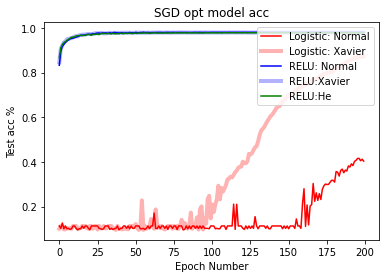

In [ ]:

plt.plot(history1.history['val_accuracy'], color = 'red')
plt.plot(history2.history['val_accuracy'], color='red',linewidth=4.0,alpha=0.3)
plt.plot(history3.history['val_accuracy'], color = 'blue')
plt.plot(history4.history['val_accuracy'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(history5.history['val_accuracy'],color='green')
plt.title('SGD opt model acc')
plt.ylabel('Test acc %')
plt.xlabel('Epoch Number')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper right')
plt.show()

We can see that SGD with Relu performs better than logistic sigmoid. Even if the initializations are changed in logistic.

##Adam 

In [ ]:
normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
xavier_ini_normal = tf.keras.initializers.GlorotNormal()
xavier_initializer = tf.keras.initializers.GlorotUniform()
he_initializer = tf.keras.initializers.HeNormal()

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam()

In [ ]:
model6 = define_model(act_fxn= 'sigmoid',init = normal_initializer)
model7 = define_model(act_fxn= 'sigmoid',init = xavier_ini_normal)
model8 = define_model(act_fxn= 'relu',init = normal_initializer)
model9 = define_model(act_fxn= 'relu',init = xavier_ini_normal)
model10 = define_model(act_fxn= 'relu',init = he_initializer)

In [ ]:

model6.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history6 = model6.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 4s 6ms/step - loss: 0.8491 - accuracy: 0.7027 - val_loss: 0.3559 - val_accuracy: 0.8973
Epoch 2/200
469/469 [==============================] - 3s 7ms/step - loss: 0.2745 - accuracy: 0.9198 - val_loss: 0.2123 - val_accuracy: 0.9383
Epoch 3/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1816 - accuracy: 0.9460 - val_loss: 0.1638 - val_accuracy: 0.9509
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1396 - accuracy: 0.9583 - val_loss: 0.1302 - val_accuracy: 0.9614
Epoch 5/200
469/469 [==============================] - 3s 6ms/step - loss: 0.1148 - accuracy: 0.9662 - val_loss: 0.1224 - val_accuracy: 0.9648
Epoch 6/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0964 - accuracy: 0.9711 - val_loss: 0.1101 - val_accuracy: 0.9684
Epoch 7/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0811 - accuracy: 0.9756 - val_loss: 0.1121 - val_accuracy: 0.9670

In [ ]:

model7.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history7 = model7.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 1.8486 - accuracy: 0.2715 - val_loss: 0.9650 - val_accuracy: 0.6922
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3934 - accuracy: 0.8872 - val_loss: 0.2063 - val_accuracy: 0.9479
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1401 - accuracy: 0.9628 - val_loss: 0.1411 - val_accuracy: 0.9602
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0939 - accuracy: 0.9743 - val_loss: 0.1140 - val_accuracy: 0.9673
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0713 - accuracy: 0.9798 - val_loss: 0.0914 - val_accuracy: 0.9748
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0550 - accuracy: 0.9841 - val_loss: 0.1061 - val_accuracy: 0.9708
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0436 - accuracy: 0.9873 - val_loss: 0.0952 - val_accuracy: 0.9752

In [ ]:

model8.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history8 = model8.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 79s 5ms/step - loss: 0.2781 - accuracy: 0.9173 - val_loss: 0.1212 - val_accuracy: 0.9633
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0935 - accuracy: 0.9728 - val_loss: 0.0926 - val_accuracy: 0.9733
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0607 - accuracy: 0.9818 - val_loss: 0.0895 - val_accuracy: 0.9747
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0948 - val_accuracy: 0.9753
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0898 - val_accuracy: 0.9788
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 0.0930 - val_accuracy: 0.9770
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0985 - val_accuracy: 0.977

In [ ]:

model9.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history9 = model9.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.2770 - accuracy: 0.9177 - val_loss: 0.1262 - val_accuracy: 0.9634
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0930 - accuracy: 0.9725 - val_loss: 0.0996 - val_accuracy: 0.9725
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0621 - accuracy: 0.9814 - val_loss: 0.0938 - val_accuracy: 0.9763
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0455 - accuracy: 0.9863 - val_loss: 0.0768 - val_accuracy: 0.9785
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0348 - accuracy: 0.9895 - val_loss: 0.0824 - val_accuracy: 0.9783
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0810 - val_accuracy: 0.9799
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0864 - val_accuracy: 0.9810

In [ ]:

model10.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history10 = model10.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.2472 - accuracy: 0.9259 - val_loss: 0.1163 - val_accuracy: 0.9654
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0841 - accuracy: 0.9747 - val_loss: 0.0933 - val_accuracy: 0.9714
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0553 - accuracy: 0.9833 - val_loss: 0.0938 - val_accuracy: 0.9752
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0843 - val_accuracy: 0.9780
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0887 - val_accuracy: 0.9792
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0967 - val_accuracy: 0.9795
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0949 - val_accuracy: 0.9769

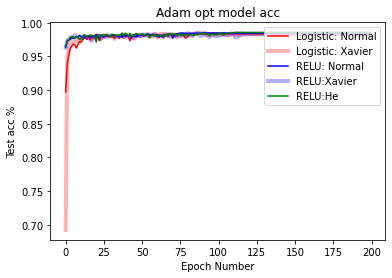

In [ ]:

plt.plot(history6.history['val_accuracy'], color = 'red')
plt.plot(history7.history['val_accuracy'], color='red',linewidth=4.0,alpha=0.3)
plt.plot(history8.history['val_accuracy'], color = 'blue')
plt.plot(history9.history['val_accuracy'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(history10.history['val_accuracy'],color='green')
plt.title('Adam opt model acc')
plt.ylabel('Test acc %')
plt.xlabel('Epoch Number')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper right')
plt.show()

We see that with Adam Optimization even Logistic sigmoid gives a performance similar to Relu. SGD is less effecient than Adam optimization for logistic ( maybe cause of local peaks). We can also observe a drastic increase in Accuracy of sigmoids after 1st epoch.